<a href="https://colab.research.google.com/github/ScionOfHeavens/FOUNDER_TASKS/blob/master/Lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача 1

In [ ]:
import numpy as np
import pandas as pd
import itertools
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('fake_news.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'fake_news.csv'

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.isnull().sum()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df['text'], df.label, test_size=0.2, random_state=7)

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

In [ ]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

In [ ]:
y_pred=pac.predict(tfidf_test)

In [ ]:
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

In [ ]:
#DataFlair - Build confusion matrix
matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= matrix,
                              display_labels=pac.classes_)
disp.plot()
plt.show()

## Задача 2

In [ ]:
df = pd.read_csv('parkinsons.data')
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [ ]:
import seaborn as sns

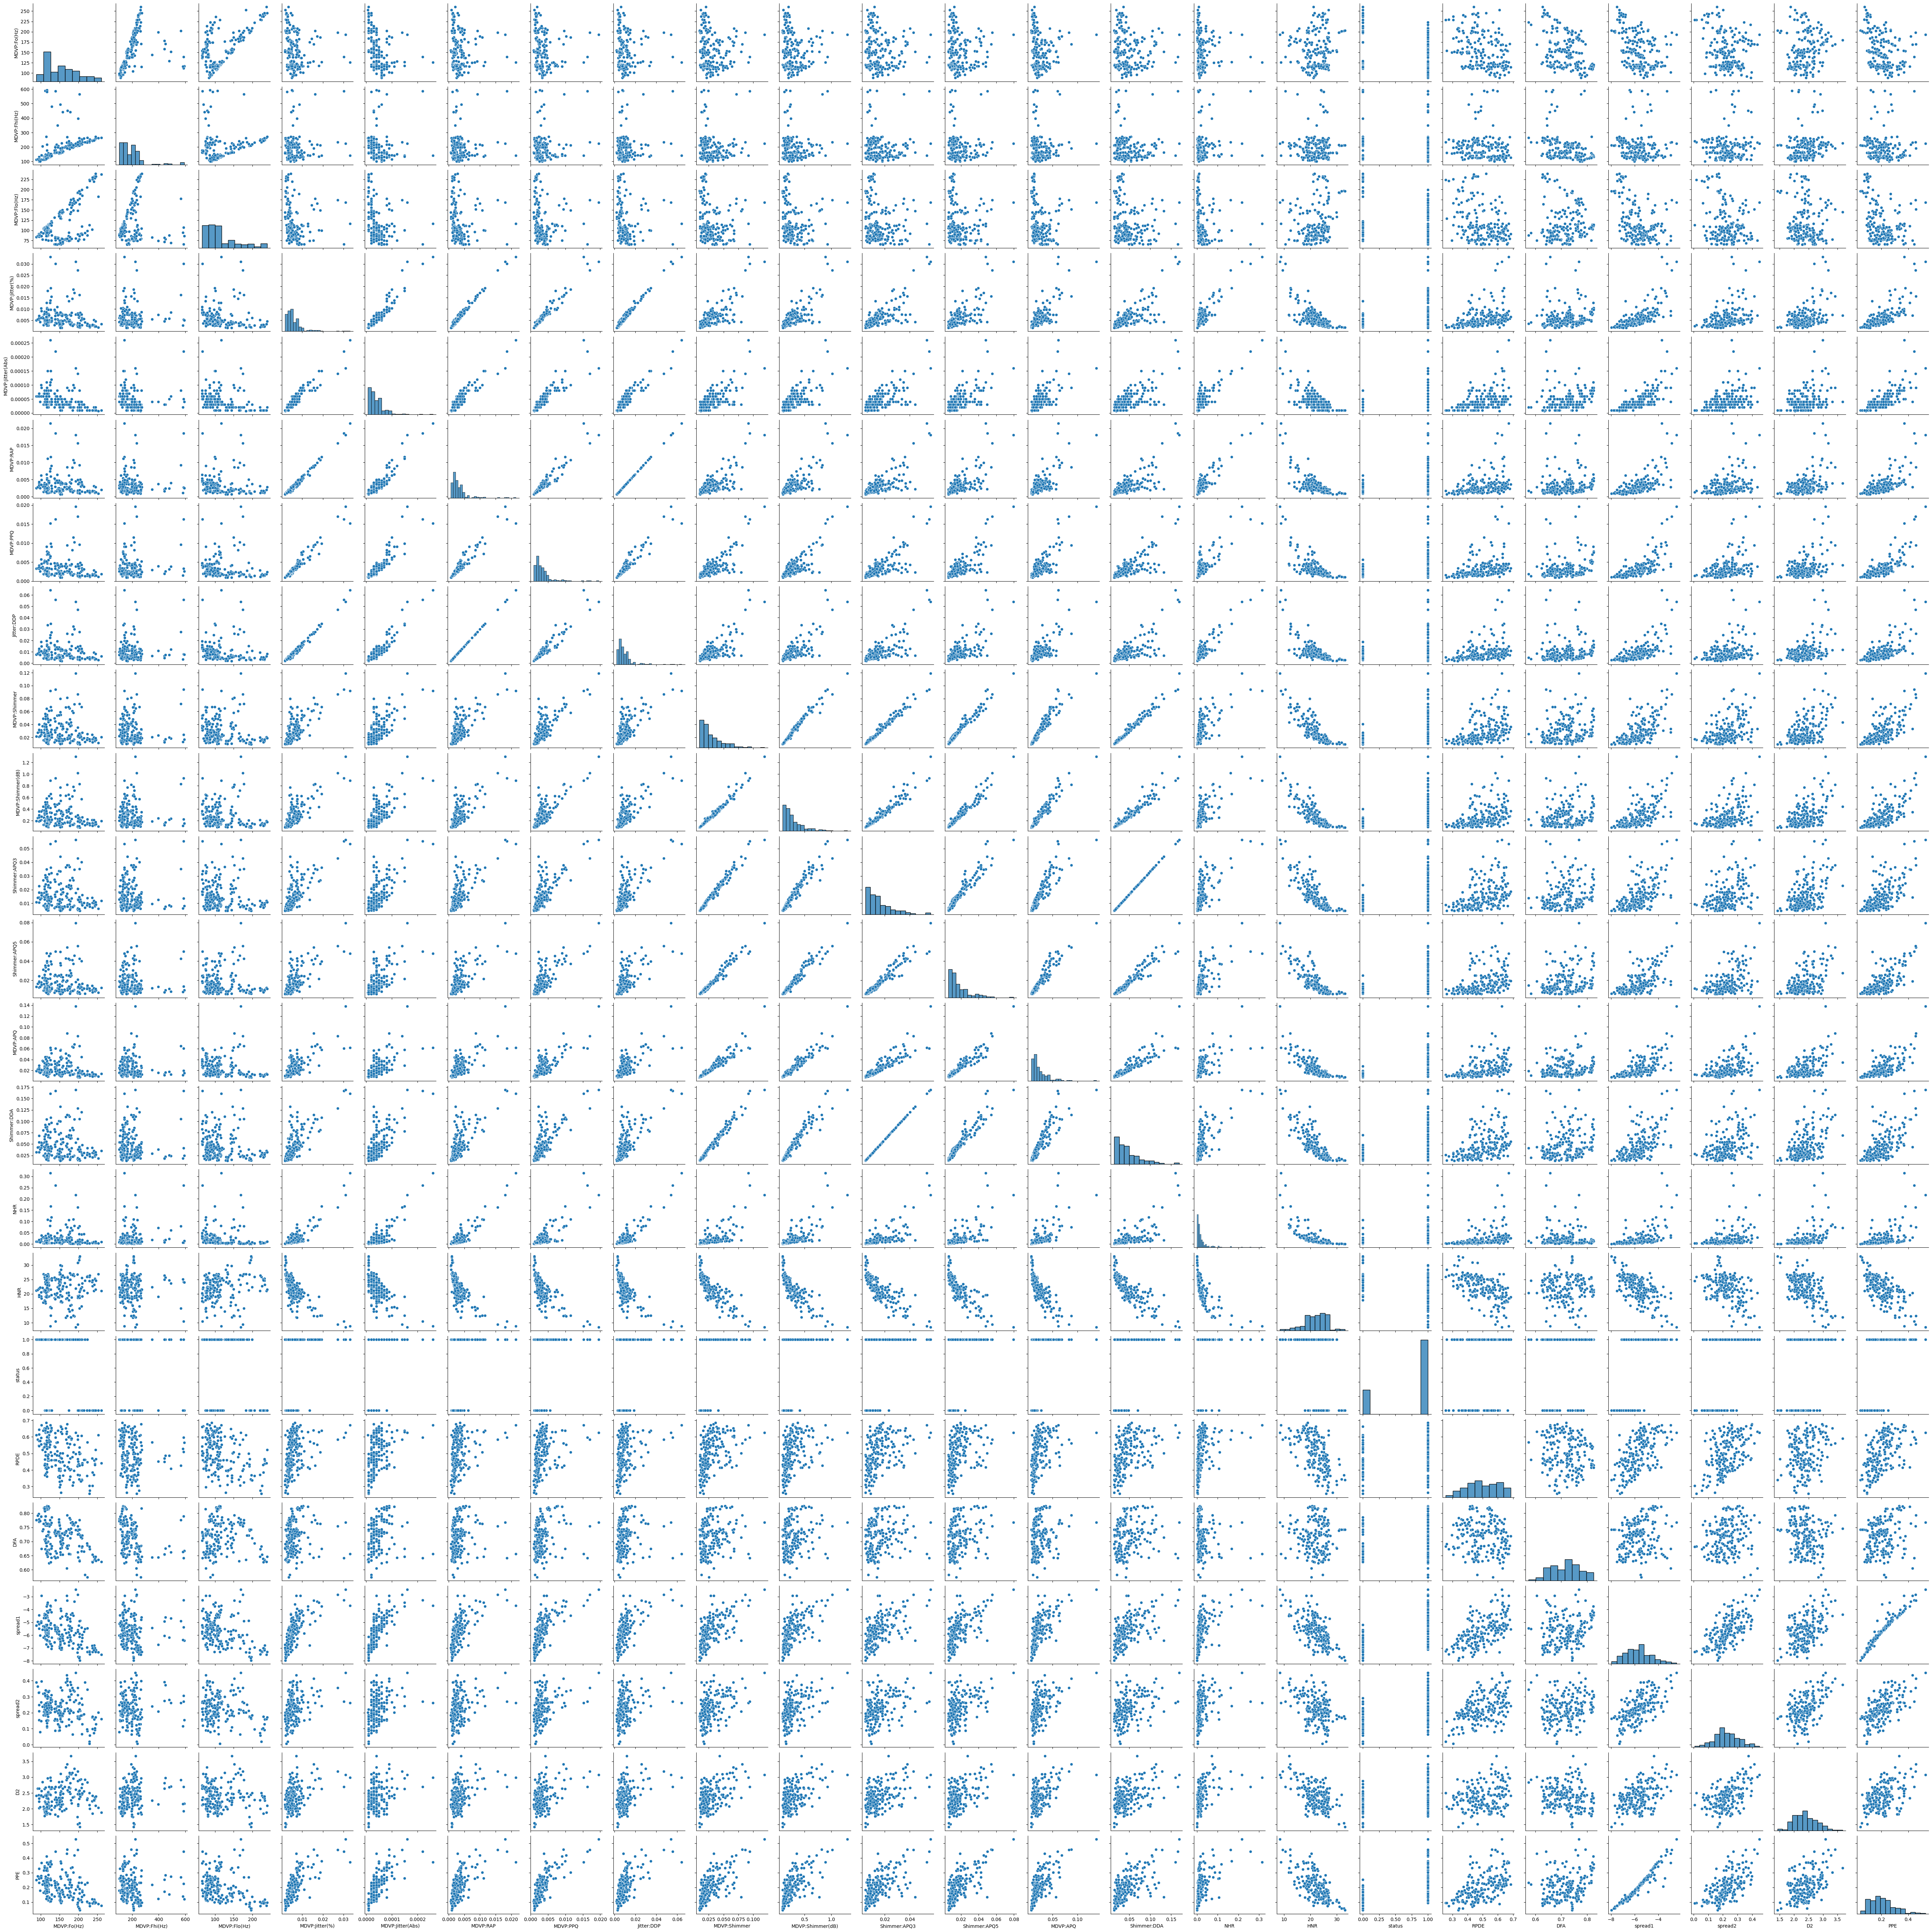

In [ ]:
sns.pairplot(data=df[df.columns[0:24]])
plt.show()

In [ ]:
# Get the features and labels
all_features=df.loc[:,(df.columns!='status') & (df.columns!='MDVP:Jitter(%)')].values[:,1:]#all featueres
out_come=df.loc[:,'status'].values#labels is status

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(all_features)
y=out_come

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

In [ ]:
print('The accuracy of the XGBoost classifier on training data is : {:.2f}'.format(xgb_clf.score(X_train, y_train)*100))
print('The accuracy of the XGBoost classifier on test data is : {:.2f}'.format(xgb_clf.score(X_test, y_test)*100))

The accuracy of the XGBoost classifier on training data is : 100.00
The accuracy of the XGBoost classifier on test data is : 94.87


In [ ]:
for i in range(1002):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    xgb_clf = xgb.XGBClassifier()
    xgb_clf = xgb_clf.fit(X_train, y_train)
    if xgb_clf.score(X_test, y_test)*100 > 95:
        print(i)

In [ ]:
from itertools import combinations
finish = False
result = 0
for j in range(1, len(df.columns) - 1):
    for i in combinations(df.columns, j):
        r = df.columns != 'status'
        for i in [df.columns != z for z in i]:
            r &= i
        all_features=df.loc[:, r].values[:,1:]#all featueres
        out_come=df.loc[:,'status'].values#labels is status
        scaler=MinMaxScaler((-1,1))
        X=scaler.fit_transform(all_features)
        y=out_come
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
        xgb_clf = xgb.XGBClassifier()
        xgb_clf = xgb_clf.fit(X_train, y_train)
        if xgb_clf.score(X_test, y_test)*100 > 95:
            result = i
            finish = True
            break
    if finish:
        break

In [ ]:
bad_column = df.columns[np.logical_not(result)]
bad_column

Index(['D2'], dtype='object')

In [ ]:
df.loc[:, result]

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     MDVP:APQ  Shimmer:DDA      NHR     HNR  status      RPDE       DFA  \
0     0.02971      0.06545  0.02211  21.033       1  0.414783  0.815285   
1     0.04368      0.09403  0.01929  19.085       1  0.458359  0.819521   
2     0.03590      0.08270  0.01309  20.651       1  0.429895  0.825288   
3     0.03772      0.08771  0.01353  20.644       1  0.434969  0.819235   
4     0.04465      0.10470  0.01767  19.649       1  0.417356  0.823484   
..        ...          ...      ...     ...     ...       ...       ...   
190   0.02745      0.07008  0.02764  19.517       0  0.448439  0.657899   
191   0.01879      0.04812  0.01810  19.147       0  0.431674  0.683244   
192   0.01667      0.03804  0.10715  17.883       0  0.407567  0.655683   
193   0.01588      0.03794  0.07223  19.020       0  0.451221  0.643956   
194   0.01373      0.03078  0.04398  21.209       0  0.462803  0.664357   

      spread1   spread2       PPE  
0   -4.813031  0.266482  0.284654  
1   -4.075192  0.335590  0.368674  
2   -4.443179  0.311173  0.332634  
3   -4.117501  0.334147  0.368975  
4   -3.747787  0.234513  0.410335  
..        ...       ...       ...  
190 -6.538586  0.121952  0.133050  
191 -6.195325  0.129303  0.168895  
192 -6.787197  0.158453  0.131728  
193 -6.744577  0.207454  0.123306  
194 -5.724056  0.190667  0.148569  

[195 rows x 23 columns]

In [ ]:
new_all_features = df.loc[:, result].values[:,1:]
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(new_all_features)
y=out_come

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

In [ ]:
print('The accuracy of the XGBoost classifier on training data is : {:.2f}'.format(xgb_clf.score(X_train, y_train)*100))
print('The accuracy of the XGBoost classifier on test data is : {:.2f}'.format(xgb_clf.score(X_test, y_test)*100))

The accuracy of the XGBoost classifier on training data is : 100.00
The accuracy of the XGBoost classifier on test data is : 100.00


In [ ]:
df.loc[:, result].shape

(195, 23)

100%? Это возможно? Я что-то не так сделал?

## Задача 3

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danilakrupnov","key":"81116c1c9a514cc6262eecfb177178b3"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stealthtechnologies/employee-attrition-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.72M/1.72M [00:00<00:00, 59.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/stealthtechnologies/employee-attrition-dataset/versions/2


In [ ]:
! ls /root/.cache/kagglehub/datasets/stealthtechnologies/employee-attrition-dataset/versions/2

test.csv  train.csv


In [ ]:
df = pd.read_csv(path + '/train.csv')
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size Company Tenure  \
0  ...                    0        Mid       Medium             89   
1  ...                    3        Mid       Medium             21   
2  ...                    3        Mid       Medium             74   
3  ...                    2        Mid        Small             50   
4  ...                    0     Senior       Medium             68   

   Remote Work Leadership Opportunities Innovation Opportunities  \
0           No                       No                       No   
1           No                       No                       No   
2           No                       No                       No   
3          Yes                       No                       No   
4           No                       No                       No   

   Company Reputation Employee Recognition Attrition  
0           Excellent               Medium    Stayed  
1                Fair                  Low    Stayed  
2                Poor                  Low    Stayed  
3                Good               Medium    Stayed  
4                Fair               Medium    Stayed  

[5 rows x 24 columns]

About Dataset
The Synthetic Employee Attrition Dataset is a simulated dataset designed for the analysis and prediction of employee attrition. It contains detailed information about various aspects of an employee's profile, including demographics, job-related features, and personal circumstances.

The dataset comprises 74,498 samples, split into training and testing sets to facilitate model development and evaluation. Each record includes a unique Employee ID and features that influence employee attrition. The goal is to understand the factors contributing to attrition and develop predictive models to identify at-risk employees.

This dataset is ideal for HR analytics, machine learning model development, and demonstrating advanced data analysis techniques. It provides a comprehensive and realistic view of the factors affecting employee retention, making it a valuable resource for researchers and practitioners in the field of human resources and organizational development.

FEATURES:

- Employee ID: A unique identifier assigned to each employee.
- Age: The age of the employee, ranging from 18 to 60 years.
- Gender: The gender of the employee
- Years at Company: The number of years the employee has been working at the company.
- Monthly Income: The monthly salary of the employee, in dollars.
- Job Role: The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.
- Work-Life Balance: The employee's perceived balance between work and personal life, (Poor, Below Average, Good, Excellent)
- Job Satisfaction: The employee's satisfaction with their job: (Very Low, Low, Medium, High)
- Performance Rating: The employee's performance rating: (Low, Below Average, Average, High)
- Number of Promotions: The total number of promotions the employee has received.
- Distance from Home: The distance between the employee's home and workplace, in miles.
- Education Level: The highest education level attained by the employee: (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD)
- Marital Status: The marital status of the employee: (Divorced, Married, Single)
- Job Level: The job level of the employee: (Entry, Mid, Senior)
- Company Size: The size of the company the employee works for: (Small,Medium,Large)
- Company Tenure: The total number of years the employee has been working in the industry.
- Remote Work: Whether the employee works remotely: (Yes or No)
- Leadership Opportunities: Whether the employee has leadership opportunities: (Yes or No)
- Innovation Opportunities: Whether the employee has opportunities for innovation: (Yes or No)
- Company Reputation: The employee's perception of the company's reputation: (Very Poor, Poor,Good, Excellent)
- Employee Recognition: The level of recognition the employee receives:(Very Low, Low, Medium, High)
- Attrition: Whether the employee has left the company, encoded as 0 (stayed) and 1 (Left).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [ ]:
import seaborn as sns

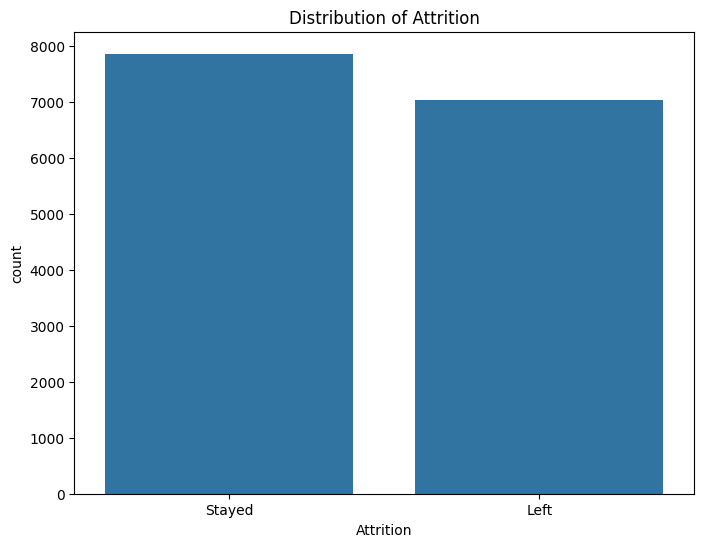

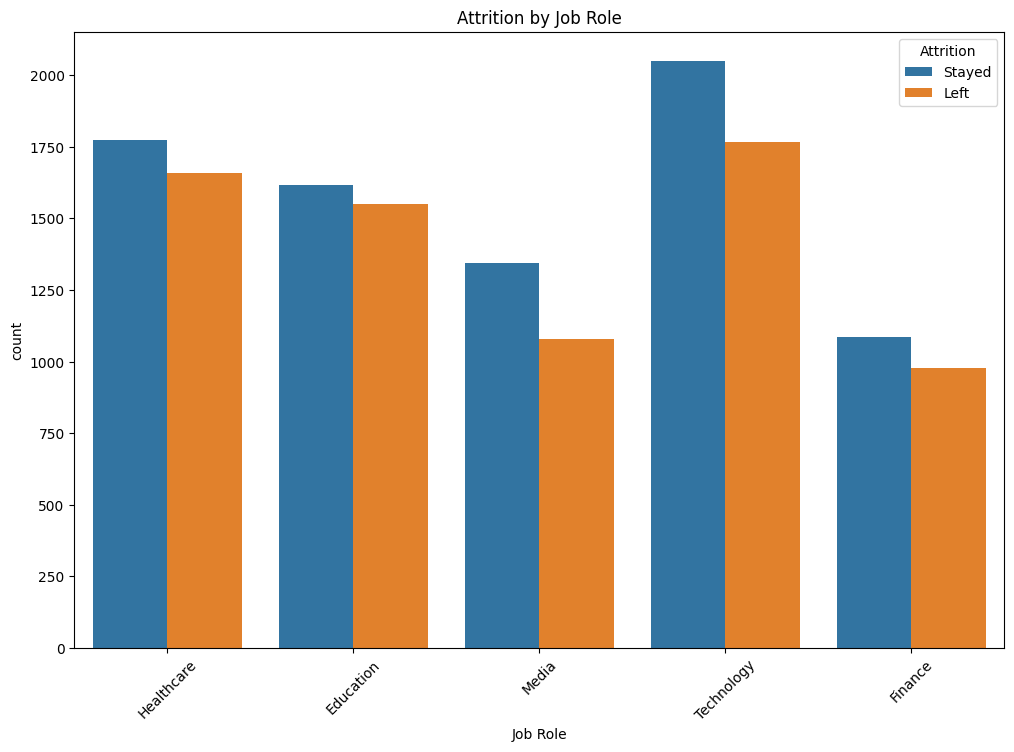

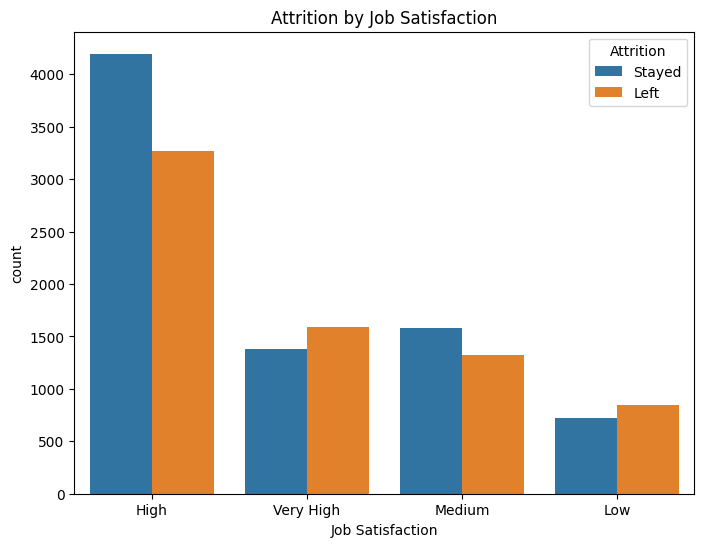

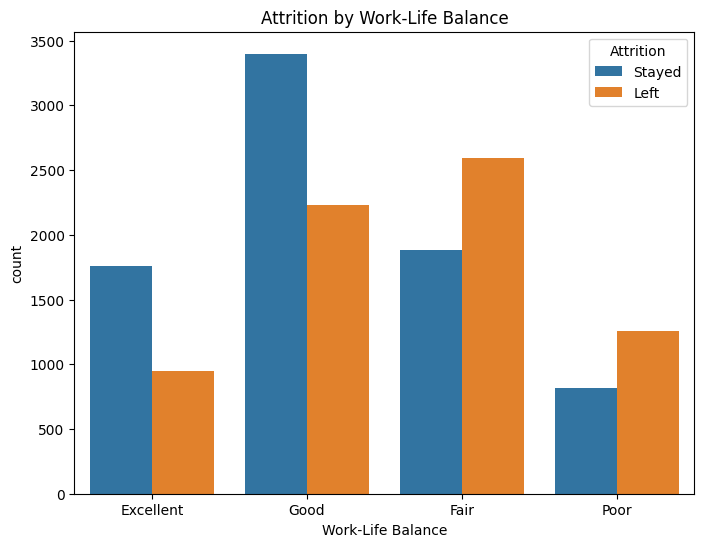

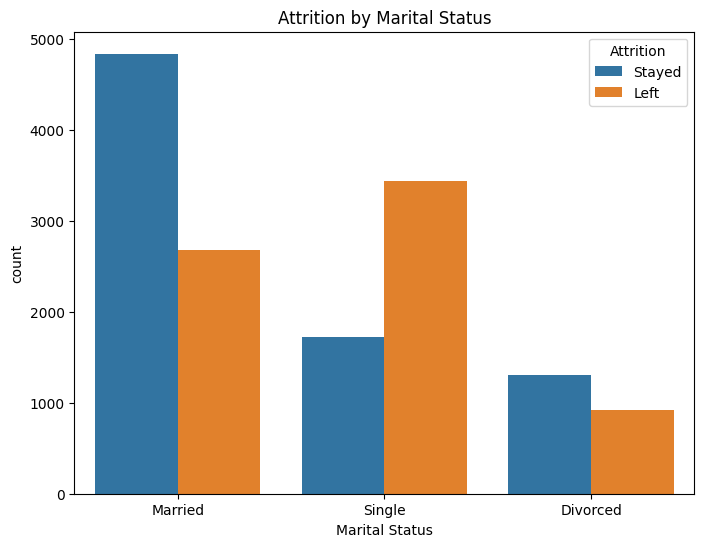

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

# Plot Attrition by Job Role
plt.figure(figsize=(12, 8))
sns.countplot(x='Job Role', hue='Attrition', data=df)
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()

# Plot Attrition by Job Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x='Job Satisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

# Plot Attrition by Work-Life Balance
plt.figure(figsize=(8, 6))
sns.countplot(x='Work-Life Balance', hue='Attrition', data=df)
plt.title('Attrition by Work-Life Balance')
plt.show()

# Plot Attrition by Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', hue='Attrition', data=df)
plt.title('Attrition by Marital Status')
plt.show()

Преобразуем строковые значения в числовые.

In [ ]:
new_df = df.copy()
new_df.drop('Employee ID', axis = 1)
new_df['Gender'] = new_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0).astype(int)
work_life_balance_evaluate_dict = {x: y for x,y in zip("Poor, Below Average, Fair, Good, Excellent".split(', '), range(5))}
new_df['Work-Life Balance'] = new_df['Work-Life Balance'].apply(lambda x: work_life_balance_evaluate_dict[x]).astype(int)
job_satisfaction_evaluate_dict = {x: y for x,y in zip("Very Low, Low, Medium, High, Very High".split(', '), range(5))}
new_df['Job Satisfaction'] = new_df['Job Satisfaction'].apply(lambda x: job_satisfaction_evaluate_dict[x]).astype(int)
performance_rating_evaluate_dict =  {x: y for x,y in zip("Low, Below Average, Average, High, Very High".split(", "), range(5))}
new_df['Performance Rating'] = new_df['Performance Rating'].apply(lambda x:performance_rating_evaluate_dict[x]).astype(int)
job_level_evaluate_dict = {x: y for x,y in zip("Entry, Junior, Mid, Senior".split(", "), range(5))}
new_df['Job Level'] = new_df['Job Level'].apply(lambda x: job_level_evaluate_dict[x]).astype(int)
new_df['Remote Work'] = new_df['Remote Work'].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
new_df['Leadership Opportunities'] = new_df['Leadership Opportunities'].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
new_df['Innovation Opportunities'] = new_df['Innovation Opportunities'].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
new_df['Overtime'] = new_df['Overtime'].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
new_df['Attrition'] = new_df['Attrition'].apply(lambda x: 1 if x == "Stayed" else 0).astype(int)
company_reputation_evaluate_dict = work_life_balance_evaluate_dict
new_df['Company Reputation'] = new_df['Company Reputation'].apply(lambda x: company_reputation_evaluate_dict[x]).astype(int)
employee_recognition_evaluate_dict = {x:y for x,y in zip("Low, Medium, High, Very High".split(", "), range(4))}
new_df['Employee Recognition'] = new_df['Employee Recognition'].apply(lambda x: employee_recognition_evaluate_dict[x]).astype(int)
company_size_evaluate_dict = {x:y for x,y in zip("Small, Medium, Large".split(", "), range(3))}
new_df['Company Size'] = new_df['Company Size'].apply(lambda x: company_size_evaluate_dict[x]).astype(int)
education_level_evaluate_dict = {x: y for x,y in zip("High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD".split(", "), range(5))}
new_df['Education Level'] = new_df['Education Level'].apply(lambda x:education_level_evaluate_dict[x]).astype(int)
marital_status_evaluate_dict = {x: y for x,y in zip("Divorced, Married, Single".split(", "), range(5))}
new_df['Marital Status'] = new_df['Marital Status'].apply(lambda x:marital_status_evaluate_dict[x]).astype(int)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  int64 
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  int64 
 7   Job Satisfaction          59598 non-null  int64 
 8   Performance Rating        59598 non-null  int64 
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  int64 
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  int64 
 13  Marital Status            59598 non-null  int64 
 14  Number of Dependents  

In [ ]:
jobe_roles = "Finance, Healthcare, Technology, Education, Media".split(', ')
for jobe_role in jobe_roles:
    new_df[jobe_role] = new_df['Job Role'].apply(lambda x: 1 if x == jobe_role else 0).astype(int)
new_df = new_df.drop('Job Role', axis='columns')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Employee ID               59598 non-null  int64
 1   Age                       59598 non-null  int64
 2   Gender                    59598 non-null  int64
 3   Years at Company          59598 non-null  int64
 4   Monthly Income            59598 non-null  int64
 5   Work-Life Balance         59598 non-null  int64
 6   Job Satisfaction          59598 non-null  int64
 7   Performance Rating        59598 non-null  int64
 8   Number of Promotions      59598 non-null  int64
 9   Overtime                  59598 non-null  int64
 10  Distance from Home        59598 non-null  int64
 11  Education Level           59598 non-null  int64
 12  Marital Status            59598 non-null  int64
 13  Number of Dependents      59598 non-null  int64
 14  Job Level                 59598 non-nu

Нормализуем значения.

In [ ]:
scaler = MinMaxScaler(feature_range = (-1, 1))
new_df = scaler.fit_transform(new_df)
new_df[0]

array([-0.77424594, -0.36585366,  1.        , -0.28      , -0.45068429,
        1.        , -0.33333333,  0.33333333,  0.        , -1.        ,
       -0.57142857, -0.5       ,  0.        , -1.        ,  0.33333333,
        0.        ,  0.38095238, -1.        , -1.        , -1.        ,
        1.        , -0.33333333,  1.        , -1.        , -1.        ,
       -1.        ,  1.        , -1.        ])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, y_train = np.concatenate((new_df[:,:22],new_df[:,23:]), axis=1), new_df[:,22].astype(int)

clf = KNeighborsClassifier().fit(X_train, y_train)
clf.score(X_train, y_train)

0.7855800530219135

In [ ]:
df = pd.read_csv(path + '/test.csv')

In [ ]:
new_df = df.copy()
new_df.drop('Employee ID', axis = 1)
new_df['Gender'] = new_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0).astype(int)
work_life_balance_evaluate_dict = {x: y for x,y in zip("Poor, Below Average, Fair, Good, Excellent".split(', '), range(5))}
new_df['Work-Life Balance'] = new_df['Work-Life Balance'].apply(lambda x: work_life_balance_evaluate_dict[x]).astype(int)
job_satisfaction_evaluate_dict = {x: y for x,y in zip("Very Low, Low, Medium, High, Very High".split(', '), range(5))}
new_df['Job Satisfaction'] = new_df['Job Satisfaction'].apply(lambda x: job_satisfaction_evaluate_dict[x]).astype(int)
performance_rating_evaluate_dict =  {x: y for x,y in zip("Low, Below Average, Average, High, Very High".split(", "), range(5))}
new_df['Performance Rating'] = new_df['Performance Rating'].apply(lambda x:performance_rating_evaluate_dict[x]).astype(int)
job_level_evaluate_dict = {x: y for x,y in zip("Entry, Junior, Mid, Senior".split(", "), range(5))}
new_df['Job Level'] = new_df['Job Level'].apply(lambda x: job_level_evaluate_dict[x]).astype(int)
new_df['Remote Work'] = new_df['Remote Work'].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
new_df['Leadership Opportunities'] = new_df['Leadership Opportunities'].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
new_df['Innovation Opportunities'] = new_df['Innovation Opportunities'].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
new_df['Overtime'] = new_df['Overtime'].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
new_df['Attrition'] = new_df['Attrition'].apply(lambda x: 1 if x == "Stayed" else 0).astype(int)
company_reputation_evaluate_dict = work_life_balance_evaluate_dict
new_df['Company Reputation'] = new_df['Company Reputation'].apply(lambda x: company_reputation_evaluate_dict[x]).astype(int)
employee_recognition_evaluate_dict = {x:y for x,y in zip("Low, Medium, High, Very High".split(", "), range(4))}
new_df['Employee Recognition'] = new_df['Employee Recognition'].apply(lambda x: employee_recognition_evaluate_dict[x]).astype(int)
company_size_evaluate_dict = {x:y for x,y in zip("Small, Medium, Large".split(", "), range(3))}
new_df['Company Size'] = new_df['Company Size'].apply(lambda x: company_size_evaluate_dict[x]).astype(int)
education_level_evaluate_dict = {x: y for x,y in zip("High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD".split(", "), range(5))}
new_df['Education Level'] = new_df['Education Level'].apply(lambda x:education_level_evaluate_dict[x]).astype(int)
marital_status_evaluate_dict = {x: y for x,y in zip("Divorced, Married, Single".split(", "), range(5))}
new_df['Marital Status'] = new_df['Marital Status'].apply(lambda x:marital_status_evaluate_dict[x]).astype(int)

In [ ]:
jobe_roles = "Finance, Healthcare, Technology, Education, Media".split(', ')
for jobe_role in jobe_roles:
    new_df[jobe_role] = new_df['Job Role'].apply(lambda x: 1 if x == jobe_role else 0).astype(int)
new_df = new_df.drop('Job Role', axis='columns')

In [ ]:
scaler = MinMaxScaler(feature_range = (-1, 1))
new_df = scaler.fit_transform(new_df)
new_df[0]

array([ 0.4148739 , -0.12195122,  1.        , -0.52      , -0.01669437,
        1.        ,  0.33333333,  0.33333333, -0.5       ,  1.        ,
        0.67346939,  0.5       ,  0.        , -0.66666667,  0.33333333,
        1.        , -0.68      , -1.        , -1.        , -1.        ,
       -1.        , -0.33333333,  1.        , -1.        ,  1.        ,
       -1.        , -1.        , -1.        ])

In [ ]:
X_test, y_test = np.concatenate((new_df[:,:22],new_df[:,23:]), axis=1), new_df[:,22].astype(int)
clf.score(X_test, y_test)

0.6755704697986578

In [ ]:
import matplotlib.pyplot as plt